In [1]:
import pandas as pd
import seaborn as sns

### Download stock data from Quandl 

In [ ]:
stock_data=quandl.get('TC1/HDFC', authtoken='Put API authentication Key here')
ds=pd.DataFrame(stock_data)
ds.to_csv('equity market tc1.csv')

In [2]:
df=pd.read_csv('equity market tc1.csv')

In [34]:
df.head()

,Open Price,High Price,Low Price,Last Traded Price,Close Price,Total Traded Quantity,Turnover (in Lakhs)
0,22.85,22.85,22.85,22.85,22.85,292150.95,66.75
1,24.67,24.67,23.13,23.66,23.66,3278746.97,775.00
2,22.58,23.65,22.19,22.97,22.80,3456472.99,792.54
3,23.44,24.44,22.97,23.05,23.08,3929548.40,918.17
4,22.58,23.07,21.88,22.36,22.31,2531002.91,569.05


In [4]:
df.shape

(2747, 8)

### Dependent variable is 'Open Price' and the rest of the columns are independent variables


In [5]:
# check missing values
df.isnull().sum()

Date                     0
Open Price               0
High Price               0
Low Price                0
Last Traded Price        0
Close Price              0
Total Traded Quantity    0
Turnover (in Lakhs)      0
dtype: int64

In [6]:
df.describe()

,Open Price,High Price,Low Price,Last Traded Price,Close Price,Total Traded Quantity,Turnover (in Lakhs)
count,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2.747000e+03,2747.000000
mean,220.615508,224.891420,216.157612,220.556604,220.595104,2.865266e+06,8306.436036
std,181.564336,184.862839,178.047946,181.362707,181.412885,3.230842e+06,11834.931533
min,0.000000,0.000000,0.000000,19.260000,22.100000,3.535040e+04,18.350000
25%,54.520000,55.330000,53.680000,54.530000,54.625000,9.798694e+05,659.825000
50%,147.510000,149.430000,146.110000,148.080000,148.020000,1.970621e+06,2837.540000
75%,356.580000,363.615000,350.615000,357.935000,357.080000,3.578130e+06,13236.610000
max,710.440000,800.980000,688.110000,703.090000,707.510000,5.784264e+07,244662.700000


In [7]:
# since the date variable might not impact our model, we shall drop it.
df.drop(['Date'],axis=1,inplace=True)

In [8]:
df.head()

,Open Price,High Price,Low Price,Last Traded Price,Close Price,Total Traded Quantity,Turnover (in Lakhs)
0,22.85,22.85,22.85,22.85,22.85,292150.95,66.75
1,24.67,24.67,23.13,23.66,23.66,3278746.97,775.00
2,22.58,23.65,22.19,22.97,22.80,3456472.99,792.54
3,23.44,24.44,22.97,23.05,23.08,3929548.40,918.17
4,22.58,23.07,21.88,22.36,22.31,2531002.91,569.05


In [9]:
df.corr()

,Open Price,High Price,Low Price,Last Traded Price,Close Price,Total Traded Quantity,Turnover (in Lakhs)
Open Price,1.000000,0.999430,0.999484,0.999154,0.999184,0.339953,0.662011
High Price,0.999430,1.000000,0.999145,0.999506,0.999542,0.347801,0.669035
Low Price,0.999484,0.999145,1.000000,0.999529,0.999558,0.331583,0.654559
Last Traded Price,0.999154,0.999506,0.999529,1.000000,0.999966,0.340217,0.662214
Close Price,0.999184,0.999542,0.999558,0.999966,1.000000,0.340485,0.662537
Total Traded Quantity,0.339953,0.347801,0.331583,0.340217,0.340485,1.000000,0.845982
Turnover (in Lakhs),0.662011,0.669035,0.654559,0.662214,0.662537,0.845982,1.000000


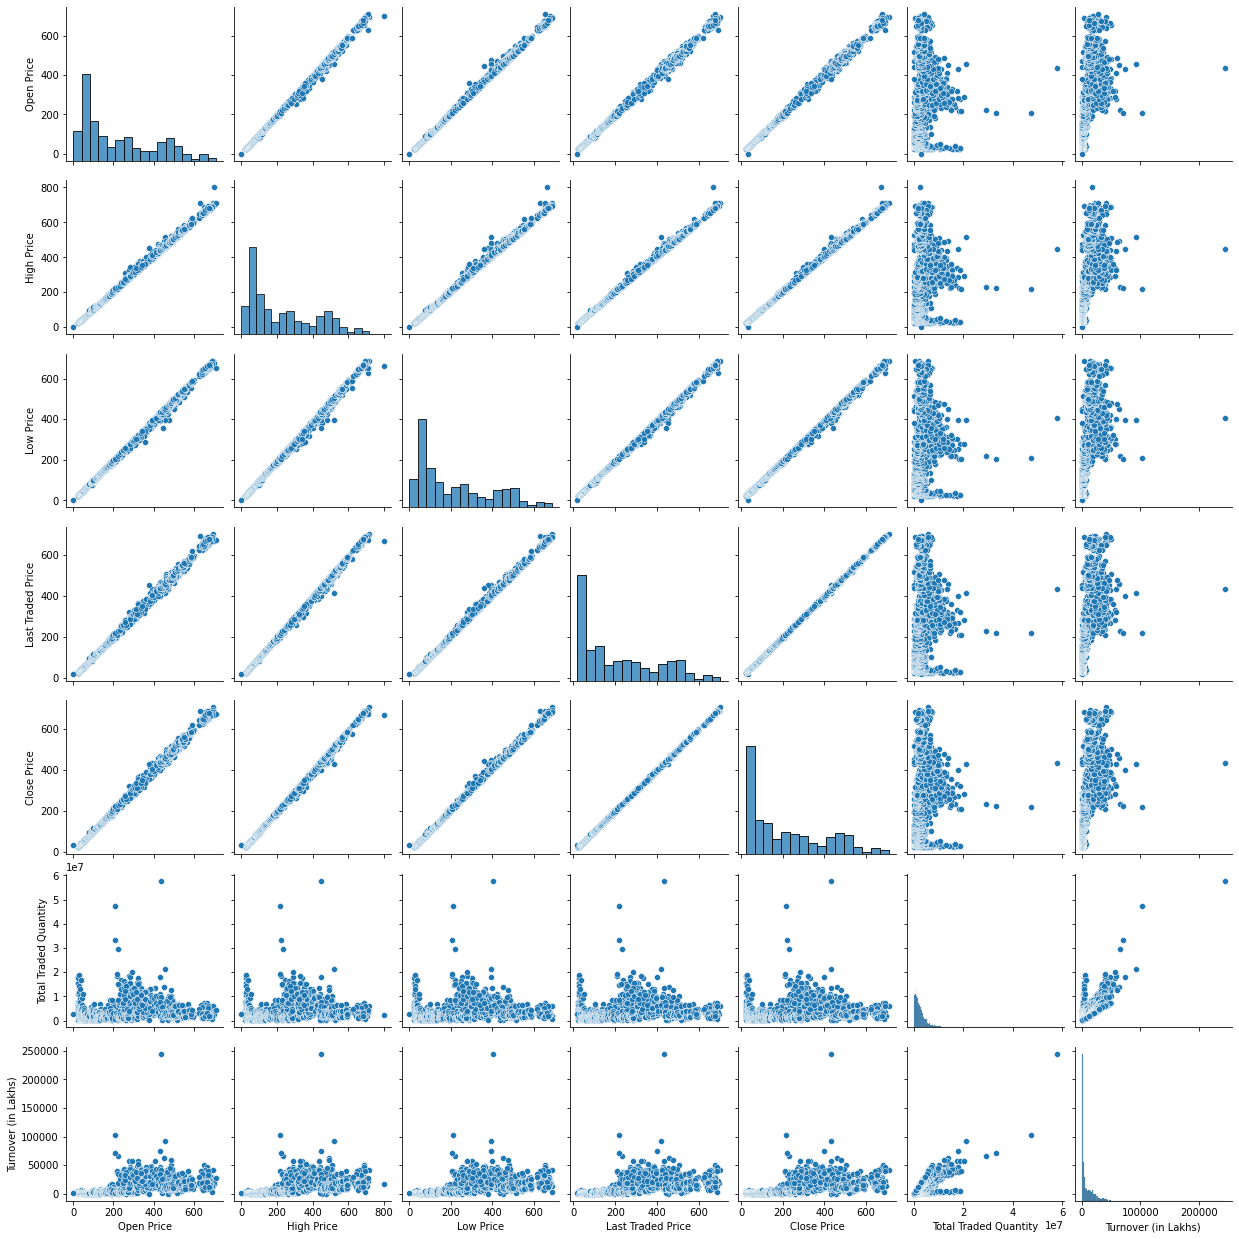

In [10]:
sns.pairplot(df)

In [11]:
# X=independent features, Y= depedent variable
X=df.iloc[:,1:]
Y=df.iloc[:,0]

In [12]:
# Finding feature importance
from sklearn.ensemble import ExtraTreesRegressor
mdl=ExtraTreesRegressor()
mdl.fit(X,Y)
mdl.feature_importances_

array([2.50019782e-01, 2.57661929e-01, 2.25181217e-01, 2.61377092e-01,
       8.31966683e-05, 5.67678377e-03])

In [13]:
# Split dataset into training and testing 
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)
X_test.shape

(550, 6)

In [14]:
# Select hyperparameters
import numpy as np

#No of trees in RF
n_estimators=[int(x) for x in np.linspace(start=100, stop=1000, num=10)]


#No of features at split
max_features=['auto','sqrt']

#Depth of tree
max_depth=[int(x) for x in np.linspace(start=5, stop=25, num=5)]

#Min No of samples to split a node
min_samples_split=[2, 5, 10, 15, 100]

#Min No of samples at each leaf
min_samples_leaf=[1, 2, 5, 10]

In [15]:
rand_grid={'n_estimators':n_estimators,
           'max_features':max_features,
           'max_depth':max_depth,
           'min_samples_split':min_samples_split,
           'min_samples_leaf':min_samples_leaf
          }
print(rand_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [16]:
# Training a Random Forest Regressor Model on the equity market dataset
# search hyperparameters for optimal parameters 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
rfr=RandomForestRegressor()
rf_random= RandomizedSearchCV(estimator=rfr, param_distributions=rand_grid, scoring='neg_mean_squared_error',n_iter=10, cv=5, verbose=2, random_state=42,n_jobs=1)
rf_random.fit(X_train, Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=700; total time=  15.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=700; total time=  23.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=700; total time=  22.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=700; total time=  21.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=700; total time=  20.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=  30.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=  30.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimat

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [23]:
predicts=rf_random.predict(X_test)
predicts

array([ 26.88320984, 261.25161522,  54.89191736,  43.30653929,
       453.95268512, 105.37011922,  55.86864426, 355.24350472,
       103.24855829, 223.79936594, 222.53908742, 195.09151718,
        38.13300678, 174.83095972, 277.52345849, 384.4802944 ,
       471.54128337, 380.73865524, 161.56569165, 335.33990734,
        34.58977889, 438.74386348,  36.0497663 , 479.67732036,
        88.59194734,  98.0040973 , 557.54905488, 139.01858337,
        43.85261821,  43.43108675, 339.80574683, 247.15628556,
       432.62535548, 227.12338921,  41.46170488, 107.06838214,
       516.97247357, 233.88193028, 276.65983829,  56.227535  ,
       391.30354119, 454.83157288,  37.54996789, 227.06371409,
        40.86766349, 266.60672242,  38.44573496, 412.35240292,
       260.73684709, 113.04278295, 656.51982   ,  51.13374588,
       400.92693298,  35.73956685,  56.39424635, 324.95371395,
       126.03984013,  53.77032706, 412.77588797,  45.93671446,
        59.99500666, 248.94060687, 155.35612718,  45.90

C:\Users\paul\anaconda3\envs\equitymarket\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Open Price', ylabel='Density'>

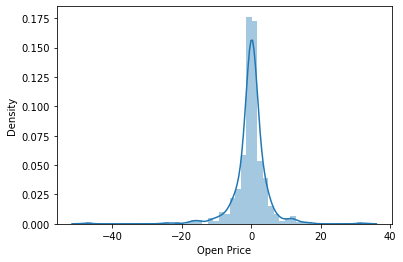

In [24]:
#visualizing predictions to actual test labels using distplot
sns.distplot(Y_test-predicts)    # a good prediction should results a bell curve (normal distribution)

### The above grapgh shows prediction errors follow a normal distribution with mean 0. This means that the difference between predicted values and dependent varibales are close to 0. This reveals the model is a good fit.

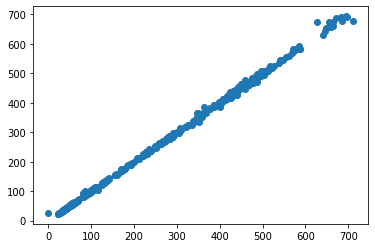

In [25]:
import matplotlib.pyplot as plt
plt.scatter(Y_test,predicts)      # a linear results of this plot indicates a good model 

### Now we will serialize the model and use it in our web python-flask application

In [35]:
from pickle import dump
fl=open('RF_regression_mdl.pkl','wb')
dump(rf_random,fl)

In [36]:
from pickle import load
mdle=load(open('RF_regression_mdl.pkl','rb'))
pred=mdle.predict([[22.85,22.85,22.85,22.85,292150.95,66.75]])

C:\Users\paul\anaconda3\envs\equitymarket\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


In [37]:
pred

array([23.21506353])